### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


<AxesSubplot:title={'center':'ASK_AMT'}, xlabel='[IS_SUCCESSFUL]'>

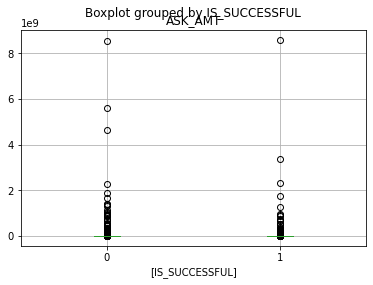

In [2]:
# application_df[["ASK_AMT", "IS_SUCCESSFUL", "USE_CASE"]].groupby(by=["USE_CASE"]).count().plot(kind="bar")
application_df[["ASK_AMT", "IS_SUCCESSFUL"]].boxplot(by=["IS_SUCCESSFUL"])

# application_df.ASK_AMT


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  REMOVE ASK_AMT
application_df = application_df.drop(["EIN","NAME", "ASK_AMT"], axis=1)

In [4]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
[(column, application_df[column].nunique()) for column in application_df]

[('APPLICATION_TYPE', 17),
 ('AFFILIATION', 6),
 ('CLASSIFICATION', 71),
 ('USE_CASE', 5),
 ('ORGANIZATION', 4),
 ('STATUS', 2),
 ('INCOME_AMT', 9),
 ('SPECIAL_CONSIDERATIONS', 2),
 ('IS_SUCCESSFUL', 2)]

In [5]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
app_counts = application_df["APPLICATION_TYPE"].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

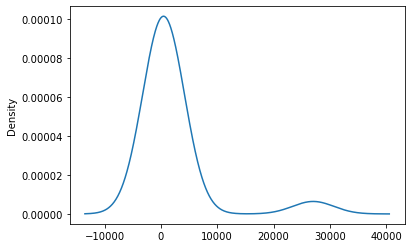

In [6]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
app_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than 500
#  YOUR CODE GOES HERE
replace_application = list(app_counts[app_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2561        1
C1732        1
C4200        1
C1900        1
C5200        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

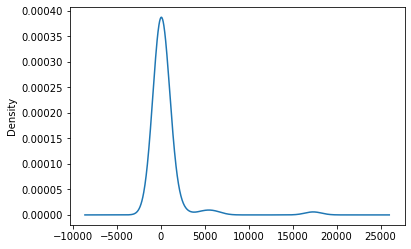

In [9]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
class_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than 1000
#  YOUR CODE GOES HERE
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)
application_df 

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(['IS_SUCCESSFUL'], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# # Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# # Fourth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# # Fifth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# # Sixth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))



# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 215       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/attempt_1_weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Save the model
nn.save("AlphabetSoupCharity_Optimization_Attempt1.h5")

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 607us/step - loss: 0.6209 - accuracy: 0.6674
Epoch 2/100
804/804 [==============================] - 0s 563us/step - loss: 0.5726 - accuracy: 0.7228
Epoch 3/100
804/804 [==============================] - 0s 529us/step - loss: 0.5654 - accuracy: 0.7264
Epoch 4/100
804/804 [==============================] - 0s 533us/step - loss: 0.5612 - accuracy: 0.7279
Epoch 5/100
804/804 [==============================] - 0s 541us/step - loss: 0.5589 - accuracy: 0.7287

Epoch 00005: saving model to checkpoints\attempt_1_weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 0s 607us/step - loss: 0.5574 - accuracy: 0.7303
Epoch 7/100
804/804 [==============================] - 0s 573us/step - loss: 0.5557 - accuracy: 0.7303
Epoch 8/100
804/804 [==============================] - 0s 599us/step - loss: 0.5552 - accuracy: 0.7297
Epoch 9/100
804/804 [==============================] - 0s 582us/step - loss: 0.5545 - accuracy: 0.7305
Epoch

804/804 [==============================] - 1s 728us/step - loss: 0.5470 - accuracy: 0.7347
Epoch 72/100
804/804 [==============================] - 1s 734us/step - loss: 0.5470 - accuracy: 0.7348
Epoch 73/100
804/804 [==============================] - 1s 797us/step - loss: 0.5470 - accuracy: 0.7346
Epoch 74/100
804/804 [==============================] - 1s 878us/step - loss: 0.5470 - accuracy: 0.7355
Epoch 75/100
804/804 [==============================] - 1s 643us/step - loss: 0.5470 - accuracy: 0.7345

Epoch 00075: saving model to checkpoints\attempt_1_weights.75.hdf5
Epoch 76/100
804/804 [==============================] - 1s 631us/step - loss: 0.5469 - accuracy: 0.7343
Epoch 77/100
804/804 [==============================] - 0s 555us/step - loss: 0.5470 - accuracy: 0.7352
Epoch 78/100
804/804 [==============================] - 0s 558us/step - loss: 0.5469 - accuracy: 0.7347
Epoch 79/100
804/804 [==============================] - 0s 607us/step - loss: 0.5469 - accuracy: 0.7350
Epoch 80/

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5550 - accuracy: 0.7254
Loss: 0.5549593567848206, Accuracy: 0.7253644466400146
